In [1]:
# install.packages("tidyverse")
# install.packages("lmerTest")

library(tidyverse)
library(lme4)
library(lmerTest)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'Matrix'

The fo

In [154]:
data <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')

# only keep hippocampal events
idx <- data$area == 'cortex'
data = data[!idx,]
print(str(data))

'data.frame':	18041 obs. of  16 variables:
 $ X              : int  0 1 2 3 4 6 7 8 9 10 ...
 $ ripple_number  : int  22 60 72 80 100 110 136 137 140 141 ...
 $ start_time     : num  211 518 608 676 933 ...
 $ end_time       : num  211 518 608 676 933 ...
 $ ripple_duration: num  0.08 0.392 0.388 0.154 0.198 ...
 $ max_emg        : num  0.991 0.995 0.991 0.994 0.993 ...
 $ peak_time      : num  211 518 608 676 933 ...
 $ peak_channel   : int  3 7 3 7 7 7 7 7 3 4 ...
 $ peak_amplitude : num  5.57 29.17 7.93 5.08 27.29 ...
 $ peak_freq      : num  214 203 104 174 120 ...
 $ clipped        : num  0 0 0 0 0 ...
 $ session        : Factor w/ 189 levels "LEM3116_S20180715121821",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ area           : Factor w/ 3 levels "ca1","ca3","cortex": 1 1 1 1 1 1 1 1 1 1 ...
 $ ep_type        : Factor w/ 7 levels "cylinder_1","cylinder_2",..: 7 7 7 7 4 1 5 5 5 5 ...
 $ group          : Factor w/ 2 levels "control","pae": 1 1 1 1 1 1 1 1 1 1 ...
 $ rat            : Factor w/ 12

In [155]:
data$group = factor(data$group)
data$rat = factor(data$rat)
data$ep_type = factor(data$ep_type, levels=c('pedestal_1', 'track','pedestal_2','cylinder_1','pedestal_3','cylinder_2','pedestal_4'))
data$session = factor(data$session)
data$area = factor(data$area)

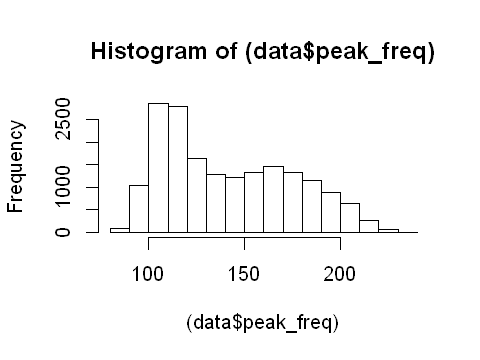

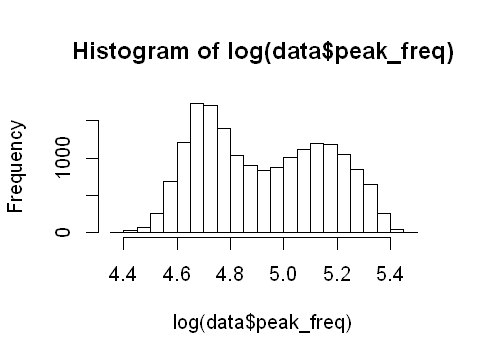

In [156]:
options(repr.plot.width = 4, repr.plot.height = 3)
hist((data$peak_freq))
hist(log(data$peak_freq))

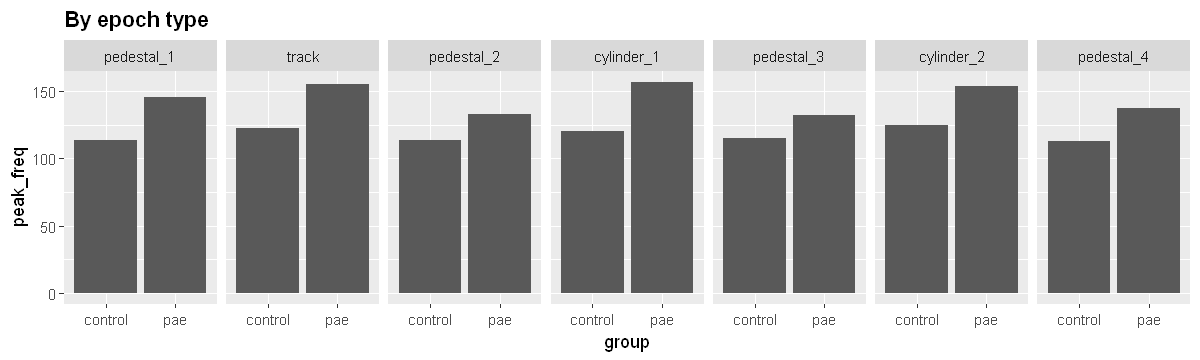

In [157]:
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(data)+
  stat_summary(aes(x=group, y=peak_freq), fun="median", geom="col")+
  facet_wrap(~ep_type, ncol = 7)+
  labs(title="By epoch type")+
  theme(legend.position = "none",
        plot.title=element_text(face="bold"))

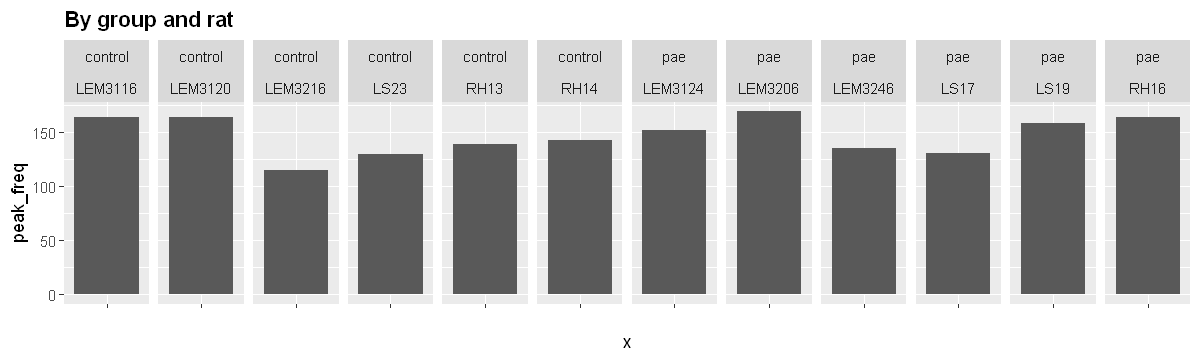

In [145]:
options(repr.plot.width = 10, repr.plot.height = 3)

ggplot(data)+
  stat_summary(aes(x='', y=peak_freq), fun="median", geom="col")+
  facet_wrap(~group+rat, ncol = 12)+
  labs(title="By group and rat")+
  theme(legend.position = "none",
        plot.title=element_text(face="bold"))

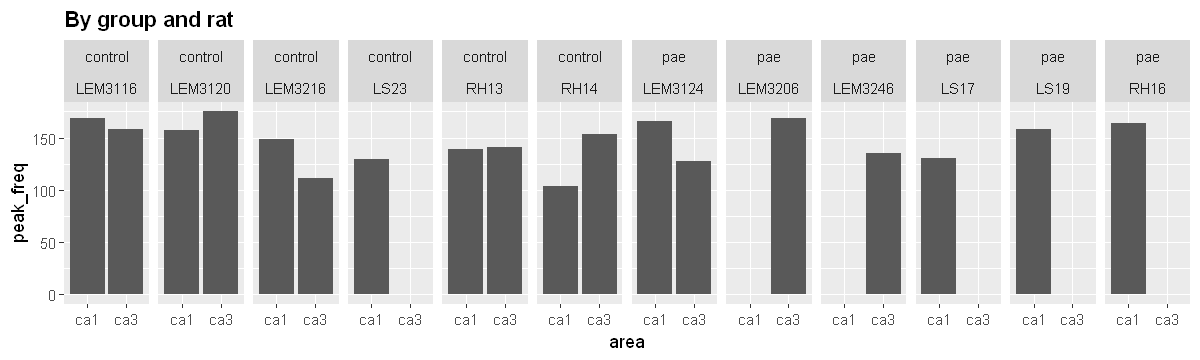

In [158]:
options(repr.plot.width = 10, repr.plot.height = 3)

ggplot(data)+
  stat_summary(aes(x=area, y=peak_freq), fun="median", geom="col")+
  facet_wrap(~group+rat, ncol = 12)+
  labs(title="By group and rat")+
  theme(legend.position = "none",
        plot.title=element_text(face="bold"))

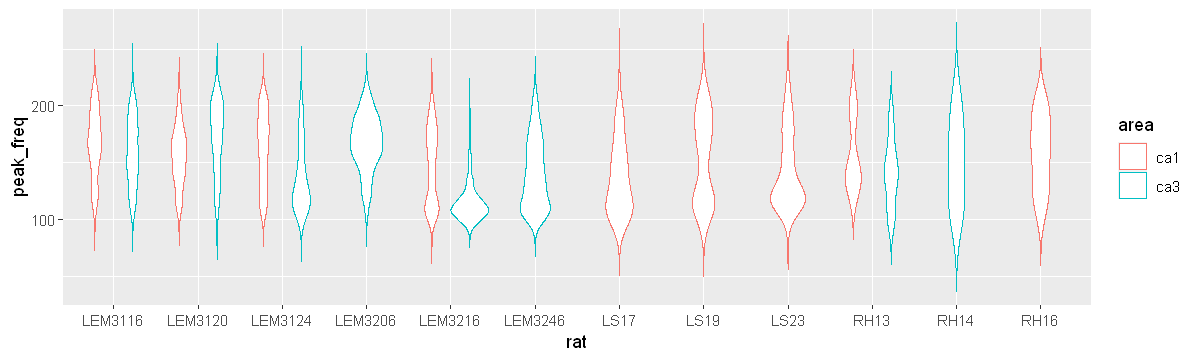

In [159]:
options(repr.plot.width = 10, repr.plot.height = 3)

p<-ggplot(data, aes(x=rat, y=peak_freq, color=area)) +
    geom_violin(trim=FALSE)
p

### intercept only model

In [46]:
m.lin.noGroup = lm(peak_freq ~ 1, data = data)
summary(m.lin.noGroup)


Call:
lm(formula = peak_freq ~ 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.324 -29.565  -7.106  27.587  96.489 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 140.9337     0.2542   554.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.52 on 17381 degrees of freedom


### Model with 1 fixed effect

In [42]:
str(unique(data$group))

 Factor w/ 2 levels "control","pae": 1 2


In [43]:
m.lin = lm(peak_freq ~ group, data = data)
summary(m.lin)


Call:
lm(formula = peak_freq ~ group, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.573 -26.139  -7.539  25.045 100.773 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 133.0395     0.3323  400.32   <2e-16 ***
grouppae     17.3935     0.4933   35.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.38 on 17380 degrees of freedom
Multiple R-squared:  0.06676,	Adjusted R-squared:  0.0667 
F-statistic:  1243 on 1 and 17380 DF,  p-value: < 2.2e-16


### no-intercept model

In [44]:
m.lin.noInt = lm(peak_freq ~ 0 + group, data = data);
summary(m.lin.noInt)


Call:
lm(formula = peak_freq ~ 0 + group, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.573 -26.139  -7.539  25.045 100.773 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
groupcontrol 133.0395     0.3323   400.3   <2e-16 ***
grouppae     150.4330     0.3646   412.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.38 on 17380 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:   0.95 
F-statistic: 1.653e+05 on 2 and 17380 DF,  p-value: < 2.2e-16


### model comparison

In [47]:
lme4:::anova.merMod(m.lin.noGroup, m.lin)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m.lin.noGroup,2,171423.7,171439.3,-85709.86,171419.7,NA,NA,NA
m.lin,3,170224.8,170248.1,-85109.40,170218.8,1200.934,1,3.821904e-263


### Mixed effect model

Let the intercept vary across rats

In [48]:
m.ri1 = lmer(peak_freq ~ group + (1 | rat), data = data,
             REML=FALSE);
summary(m.ri1)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: peak_freq ~ group + (1 | rat)
   Data: data

     AIC      BIC   logLik deviance df.resid 
166702.5 166733.6 -83347.3 166694.5    17378 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6252 -0.7203 -0.2294  0.6904  3.3312 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 143.9    11.99   
 Residual             853.6    29.22   
Number of obs: 17382, groups:  rat, 12

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  147.596      5.254  14.057   28.09 9.43e-14 ***
grouppae       3.625      7.253  13.175    0.50    0.625    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.724

### Does this random effect add to explained variance compared to the fixed-effect-only model?

In [49]:
anova(m.ri1, m.lin.noInt)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m.lin.noInt,3,170224.8,170248.1,-85109.40,170218.8,NA,NA,NA
m.ri1,4,166702.5,166733.6,-83347.27,166694.5,3524.246,1,0


### add another random intercept: session

In [62]:
m.ri2 = lmer(peak_freq ~ group + (1 | rat) + (1 | session), data = data,
             REML=FALSE);
coef(summary(m.ri2))    # fixed

,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),147.143299,5.639604,15.12151,26.0910678,5.447133e-14
grouppae,-2.497438,7.687711,13.83375,-0.3248611,7.501468e-01


In [63]:
VarCorr(m.ri2)          # random

 Groups   Name        Std.Dev.
 session  (Intercept) 14.229  
 rat      (Intercept) 11.867  
 Residual             25.178  

### Let’s compare our models to see if adding the session intercept actually improved model fit.

In [65]:
anova(m.ri1, m.ri2)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m.ri1,4,166702.5,166733.6,-83347.27,166694.5,NA,NA,NA
m.ri2,5,161979.4,162018.2,-80984.71,161969.4,4725.117,1,0


### Add a 3rd random intercept: ep_type

In [37]:
m.ri3 = lmer(peak_freq ~ group + (1 | rat) + (1 | session) + (1 | ep_type), data = data[data$area == "ca3",],
             REML=FALSE)
# coef(summary(m.ri3))    # fixed
summary(m.ri3)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: peak_freq ~ group + (1 | rat) + (1 | session) + (1 | ep_type)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
115656.7 115701.4 -57822.4 115644.7    12694 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5558 -0.6086 -0.1211  0.5654  4.7108 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 135.178  11.627  
 ep_type  (Intercept)   4.486   2.118  
 rat      (Intercept) 276.276  16.622  
 Residual             514.164  22.675  
Number of obs: 12700, groups:  session, 108; ep_type, 7; rat, 7

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 145.7381     8.1926   8.6570  17.789 4.07e-08 ***
grouppae     -0.5608    14.3961   7.0685  -0.039     0.97    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)

In [67]:
VarCorr(m.ri3)          # random

 Groups   Name        Std.Dev.
 session  (Intercept) 13.7372 
 rat      (Intercept) 11.7038 
 ep_type  (Intercept)  2.4845 
 Residual             25.1126 

In [68]:
anova(m.ri2, m.ri3)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m.ri2,5,161979.4,162018.2,-80984.71,161969.4,NA,NA,NA
m.ri3,6,161897.0,161943.5,-80942.48,161885.0,84.46889,1,3.903089e-20


### Random slopes

In [69]:
m.ris = lmer(peak_freq ~ group + (1 + group | rat) + (1 + group| session) + (1 + group | ep_type), data = data, REML=FALSE)


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"unable to evaluate scaled gradient"Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge: degenerate  Hessian with 2 negative eigenvalues"Warning message:
"Model failed to converge with 2 negative eigenvalues: -3.0e-03 -1.7e-02"

In [70]:
m.ris = lmer(peak_freq ~ group + (1 + group | rat) + (1 | session) + (1 | ep_type), data = data, REML=FALSE)
coef(summary(m.ris))    # fixed


,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),146.129586,6.298818,7.533485,23.1995245,2.788156e-08
grouppae,-1.710217,7.631366,12.794971,-0.2241037,8.262154e-01


In [71]:
VarCorr(m.ris)          # random


 Groups   Name        Std.Dev. Corr  
 session  (Intercept) 13.7366        
 rat      (Intercept) 13.4802        
          grouppae     7.5610  -0.701
 ep_type  (Intercept)  2.4837        
 Residual             25.1127        

In [72]:
anova(m.ris, m.ri3)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m.ri3,6,161897.0,161943.5,-80942.48,161885.0,NA,NA,NA
m.ris,8,161900.5,161962.6,-80942.24,161884.5,0.4867732,2,0.7839684


# Interactions

In [5]:
m.ris2 = lmer(peak_freq ~ group + area + (1 | rat) + (1 | session) + (1 | ep_type), data = data,
             REML=FALSE)
coef(summary(m.ris2))    # fixed


,Estimate,Std. Error,df,t value,Pr(>|t|)
(Intercept),152.317156,6.124098,18.68804,24.8717695,8.788148e-16
grouppae,-3.976712,7.853385,13.64240,-0.5063692,6.206817e-01
areaca3,-10.759921,3.446722,170.66729,-3.1217837,2.111666e-03


In [6]:
VarCorr(m.ris2)          # random

 Groups   Name        Std.Dev.
 session  (Intercept) 13.1725 
 rat      (Intercept) 12.2419 
 ep_type  (Intercept)  2.4844 
 Residual             25.1142 

In [28]:
m.ris3 = lmer(peak_freq ~ group * area + (1 | rat) + (1 | session) + (1 | ep_type), data = data,
             REML=FALSE)
summary(m.ris3)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: peak_freq ~ group * area + (1 | rat) + (1 | session) + (1 | ep_type)
   Data: data

     AIC      BIC   logLik deviance df.resid 
161890.4 161952.5 -80937.2 161874.4    17374 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2376 -0.6384 -0.0985  0.6225  4.2280 

Random effects:
 Groups   Name        Variance Std.Dev.
 session  (Intercept) 173.393  13.168  
 rat      (Intercept) 134.019  11.577  
 ep_type  (Intercept)   6.156   2.481  
 Residual             630.719  25.114  
Number of obs: 17382, groups:  session, 189; rat, 12; ep_type, 7

Fixed effects:
                 Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)       153.056      5.923  20.351  25.843  < 2e-16 ***
grouppae           -8.911      8.646  15.944  -1.031  0.31806    
areaca3           -11.997      3.621 172.498  -3.313  0.00112 ** 
grouppae:areaca3   12.805     11.145  14.421   1.

In [26]:
VarCorr(m.ris3)          # random

 Groups   Name        Std.Dev.
 session  (Intercept) 13.168  
 rat      (Intercept) 11.577  
 ep_type  (Intercept)  2.481  
 Residual             25.114  

In [13]:
m.ris = lmer(peak_freq ~ group + (1 | rat) + (1 | session) + (1 | ep_type), data = data,
             REML=FALSE)

anova(m.ris3, m.ris)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m.ris,6,161897.0,161943.5,-80942.48,161885.0,NA,NA,NA
m.ris3,8,161890.4,161952.5,-80937.22,161874.4,10.52461,2,0.005183338


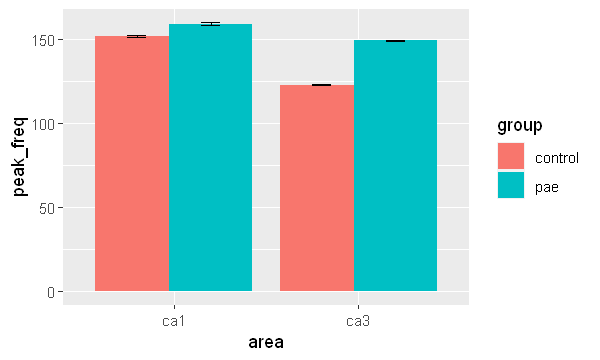

In [160]:
options(repr.plot.width = 5, repr.plot.height = 3)

ggplot(data)+
  stat_summary(aes(x=area, y=peak_freq, fill=group), 
               geom="col", fun="mean", position=position_dodge(0.8))+
  stat_summary(aes(x=area, y=peak_freq, group=group), 
               geom='errorbar', fun.data='mean_se', position=position_dodge(0.8), width=0.2)

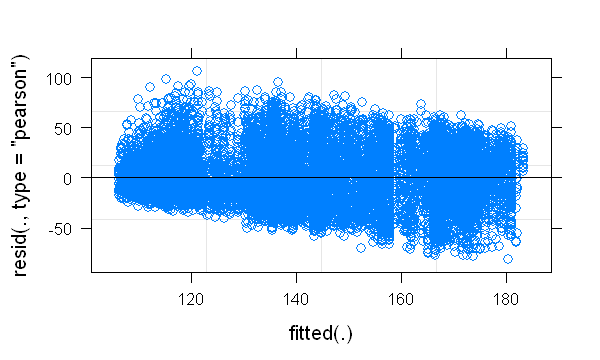

In [20]:
plot(m.ris3)

# Testing significance

### Method 1: read p-values from model summay

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: peak_freq_log ~ group + (1 | rat/session)
   Data: data[data$area == "ca3", ]

     AIC      BIC   logLik deviance df.resid 
-10176.3 -10138.8   5093.1 -10186.3    13338 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7354 -0.6367 -0.0706  0.6168  3.9928 

Random effects:
 Groups      Name        Variance Std.Dev.
 session:rat (Intercept) 0.005758 0.07588 
 rat         (Intercept) 0.012431 0.11149 
 Residual                0.026625 0.16317 
Number of obs: 13343, groups:  session:rat, 123; rat, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  4.95703    0.05473  9.79944  90.568 1.18e-15 ***
grouppae    -0.01982    0.08508  8.40392  -0.233    0.821    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
grouppae -0.643

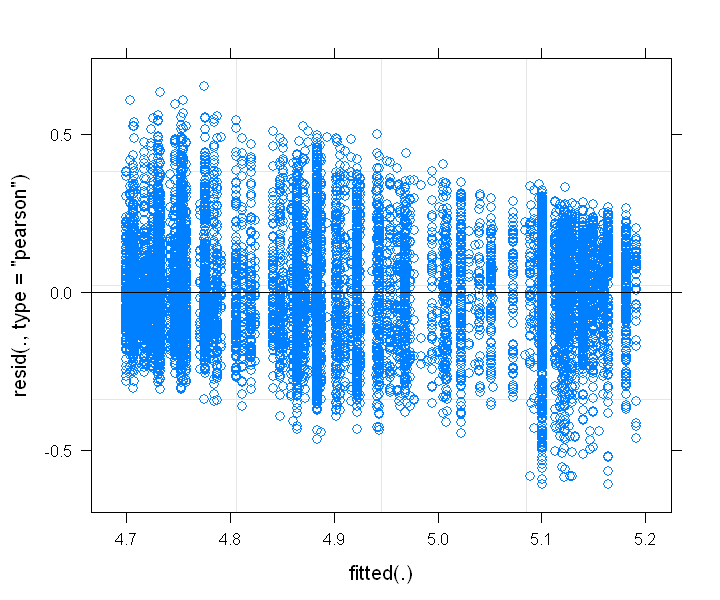

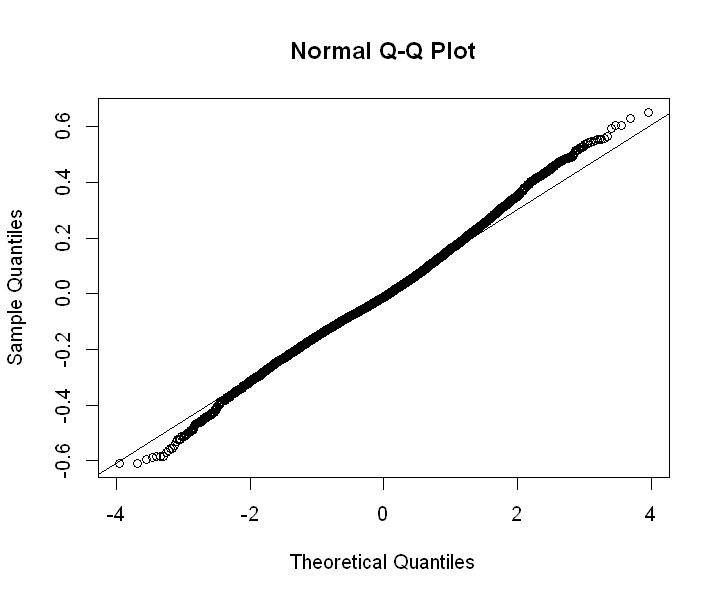

In [166]:
options(repr.plot.width = 6, repr.plot.height = 5)

data$peak_freq_log <- log(data$peak_freq)
# m1 = lmer(peak_freq ~ group + (1 | rat) + (1 | session) + (1 | ep_type), data = data, REML=FALSE)
# m1 = lmer(peak_freq_log ~ group + (1 | rat) + (1 | session), data = data[data$area == "ca3",],REML=FALSE)
m1 = lmer(peak_freq_log ~ group + (1 | rat/session), data = data[data$area == "ca3",],REML=FALSE)

# coef(summary(m.ri3))    # fixed
summary(m1)
plot(m1)

qqnorm(resid(m1))
qqline(resid(m1))

### Method 2: Model comparison

1. Create a “null” model where the predictor of interest is missing

In [167]:
m1.null = lmer(peak_freq_log ~ 1 + (1 | rat/session), data = data[data$area == "ca3",], REML=FALSE)

2. Use the likelihood ratio test (the anova() command) to find out if the model with more parameters fits the data better.

In [168]:
anova(m1.null, m1)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
m1.null,4,-10178.20,-10148.20,5093.099,-10186.20,NA,NA,NA
m1,5,-10176.25,-10138.76,5093.127,-10186.25,0.05414031,1,0.8160094


# Method 3: pairwise tests

If you just want the mean estimates for each condition and you want to compare them to 0, you can use ls_means() from lmerTest

In [101]:
ls_means(m1)

,Estimate,Std. Error,df,t value,lower,upper,Pr(>|t|)
groupcontrol,4.956520,0.05749912,8.495047,86.20167,4.825260,5.08778,8.45388e-14
grouppae,4.957219,0.08379320,6.547165,59.16016,4.756267,5.15817,3.50507e-10


In [105]:
ls_means(m1, pairwise = TRUE)


,Estimate,Std. Error,df,t value,lower,upper,Pr(>|t|)
groupcontrol - grouppae,-0.000698942,0.1016241,7.091554,-0.006877722,-0.2403742,0.2389763,0.9947019


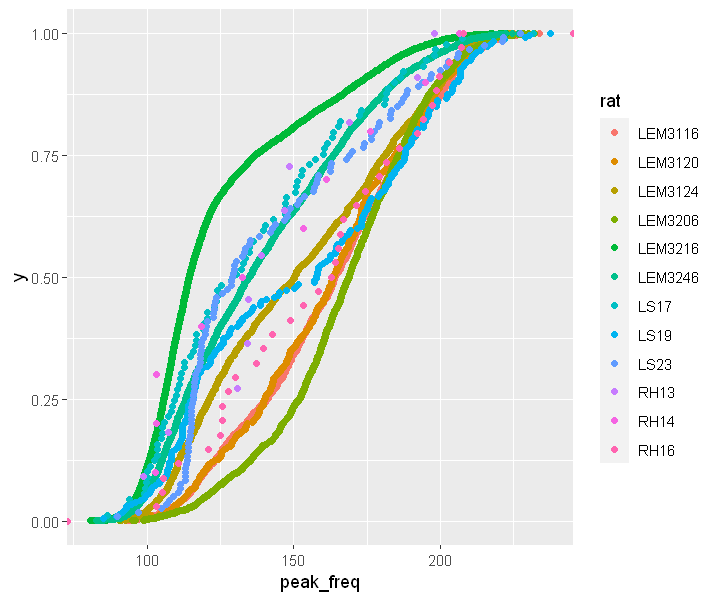

In [164]:
ggplot(data, aes(x=peak_freq,colour = rat)) + stat_ecdf(geom = "point")

In [165]:
xtabs(~group+rat+area,data=data)

, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     722     263       0       0    2300       0    0    0  120    3
  pae           0       0     933       0       0       0   89  233    0    0
         rat
group     RH14 RH16
  control    1    0
  pae        0   34

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     765     189       0       0    5113       0    0    0    0    8
  pae           0       0     644    2498       0    4117    0    0    0    0
         rat
group     RH14 RH16
  control    9    0
  pae        0    0


In [130]:
df <- read.csv('D:/ryanh/github/harvey_et_al_2020/Rdata_pae_track_cylinder_all_cells.csv')
# # print(str(df))
xtabs(~group+rat+area,data=df)
# str_split(df$session, "_")[1]

, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     253     152       0       0    1089       0    0    0   62   74
  pae           0       0    1502       0       0       0  336 1297    0    0
         rat
group     RH14 RH16
  control   38    0
  pae        0  438

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control     953     304       0       0    1241       0    0    0    0  180
  pae           0       0    1472    6240       0    2085    0    0    0    0
         rat
group     RH14 RH16
  control   29    0
  pae        0    0


In [140]:
unique(df$session[df$rat =='LEM3124' & df$area == "ca3"])

[1] LEM3124_S20190307132509.mat LEM3124_S20190307163732.mat
 [3] LEM3124_S20190309145324.mat LEM3124_S20190311161641.mat
 [5] LEM3124_S20190315160017.mat LEM3124_S20190319154019.mat
 [7] LEM3124_S20190322123145.mat LEM3124_S20190325164111.mat
 [9] LEM3124_S20190326160632.mat LEM3124_S20190327204851.mat
[11] LEM3124_S20190328174647.mat LEM3124_S20190329151248.mat
[13] LEM3124_S20190331172013.mat LEM3124_S20190401125222.mat
[15] LEM3124_S20190402101910.mat
204 Levels: LEM3116_S20180715121821.mat ... RH16_S20161207130000.mat

In [139]:
df_swr <- read.csv('F:/Projects/PAE_PlaceCell/analysis/multiunit_data/post_processed/mua_df.csv')
# df_swr
xtabs(~group+rat+area,data=df_swr)



, , area = ca1

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control    5866    1373       0       0    2808       0    0    0 1244   25
  pae           0       0    3571       0       0       0 2042 6509    0    0
         rat
group     RH14 RH16
  control   74    0
  pae        0  190

, , area = ca3

         rat
group     LEM3116 LEM3120 LEM3124 LEM3206 LEM3216 LEM3246 LS17 LS19 LS23 RH13
  control    6045    1724       0       0    6007       0    0    0    0   49
  pae           0       0       0    7196       0    8817    0    0    0    0
         rat
group     RH14 RH16
  control  134    0
  pae        0    0
